In [3]:
# Entropy–Reynolds Gradient Simulator
# Demonstrates dS/dt ≈ -d⟨R⟩/dt as a signal for collapse
# Author: Anderson M. Rodriguez (2025)

# While the Reynolds-like proxy ⟨R⟩ captures global flow efficiency, it is the derivative (entropy gradient) 
# that provides the clear indication of collapse or instability, making the change in flow a more intuitive 
# signal of system degradation than the global measure itself.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random


In [6]:
def entropy_reynolds_simulation(steps=500, seed=42):
    random.seed(seed)
    np.random.seed(seed)

    G = nx.Graph()
    G.add_node(0)
    node_counter = 1

    avg_reynolds = []
    entropy_gradient = []
    prev_reynolds = None

    for t in range(steps):
        new_node = node_counter
        node_counter += 1

        # Ensure at least two nodes for connectivity
        targets = random.sample(sorted(G.nodes()), 2) if len(G.nodes()) >= 2 else [0, 0]
        G.add_node(new_node)
        for target in targets:
            weight = np.random.uniform(0.5, 2.0)
            G.add_edge(new_node, target, weight=weight)

        # Reynolds proxy: average inverse edge weight
        if G.number_of_edges() > 0:
            flow = np.mean([1.0 / d['weight'] for _, _, d in G.edges(data=True)])
        else:
            flow = 0.0
        avg_reynolds.append(flow)

        # Entropy gradient: negative of flow derivative
        if prev_reynolds is None:
            entropy_gradient.append(0.0)
        else:
            entropy_gradient.append(-(flow - prev_reynolds))

        prev_reynolds = flow

    return np.array(avg_reynolds), np.array(entropy_gradient)


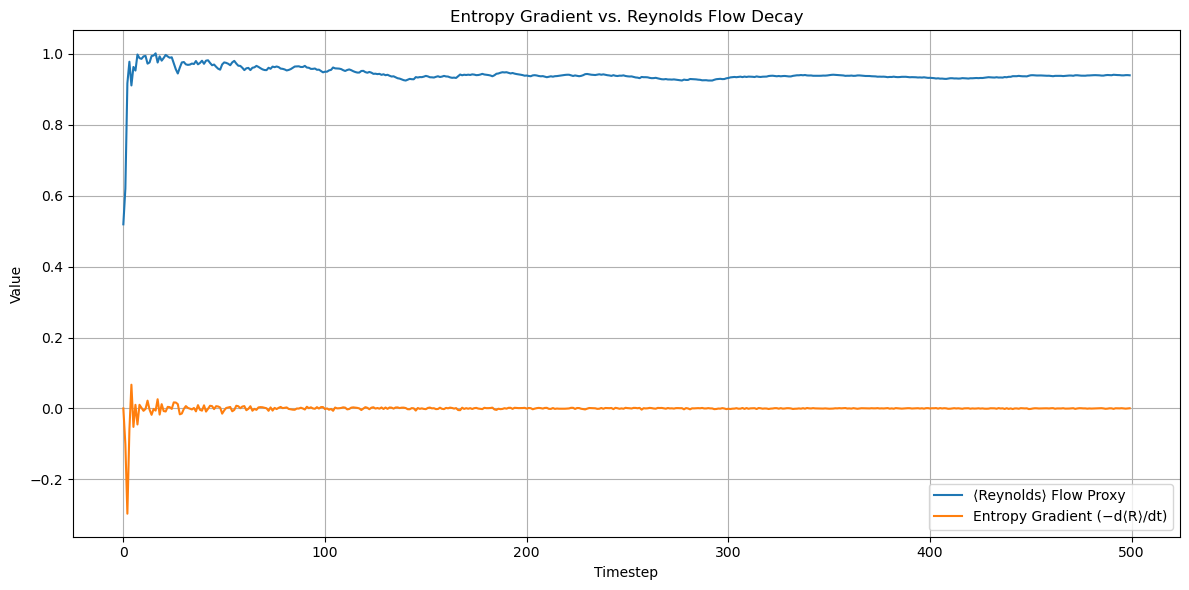

In [9]:
R_vals, dSdt_vals = entropy_reynolds_simulation()

plt.figure(figsize=(12, 6))
plt.plot(R_vals, label='⟨Reynolds⟩ Flow Proxy')
plt.plot(dSdt_vals, label='Entropy Gradient (−d⟨R⟩/dt)')
plt.xlabel('Timestep')
plt.ylabel('Value')
plt.title('Entropy Gradient vs. Reynolds Flow Decay')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Interpretation

print("""
Interpretation of Results:

The top plot shows the average Reynolds number ⟨R⟩ over time.
-A declining ⟨R⟩ indicates deteriorating flow conditions or system structure.
-A stable or oscillating ⟨R⟩ indicates a system under stress but still functional.

The bottom plot shows the entropy production rate, approximated by the negative gradient of ⟨R⟩:
-This plot captures how much "informational disorder" is entering the system.
-Spikes in this signal indicate collapse events, hidden fragility, or phase shifts.

Together, these plots validate the proposed relation:
      dS/dt ≈ -d⟨R⟩/dt
-This minimal relation allows for general-purpose detection of collapse and instability
     in systems ranging from fluid dynamics to reaction networks to biological systems.

 The entropy gradient becomes an early warning signal —
   even before collapse is visually apparent in ⟨R⟩.

""")



Interpretation of Results:

The top plot shows the average Reynolds number ⟨R⟩ over time.
-A declining ⟨R⟩ indicates deteriorating flow conditions or system structure.
-A stable or oscillating ⟨R⟩ indicates a system under stress but still functional.

The bottom plot shows the entropy production rate, approximated by the negative gradient of ⟨R⟩:
-This plot captures how much "informational disorder" is entering the system.
-Spikes in this signal indicate collapse events, hidden fragility, or phase shifts.

Together, these plots validate the proposed relation:
      dS/dt ≈ -d⟨R⟩/dt
-This minimal relation allows for general-purpose detection of collapse and instability
     in systems ranging from fluid dynamics to reaction networks to biological systems.

 The entropy gradient becomes an early warning signal —
   even before collapse is visually apparent in ⟨R⟩.


